In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('stroke_data.csv')
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,73,0,0,1,Private,1,143.509078,29.160236,formerly smoked,1
1,Female,49,0,0,1,Private,0,85.230000,25.400000,Unknown,0
2,Male,58,0,0,1,Private,0,197.174377,34.870606,formerly smoked,1
3,Female,69,0,0,1,Self-employed,1,99.680000,17.600000,formerly smoked,0
4,Male,60,0,0,1,Private,0,69.200000,30.900000,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
3995,Male,40,0,0,0,Govt_job,1,197.110000,23.900000,never smoked,0
3996,Male,64,0,0,1,Self-employed,0,114.000886,32.598340,formerly smoked,1
3997,Male,80,0,1,1,Private,0,67.464694,22.728583,formerly smoked,1
3998,Female,41,0,0,1,Private,1,80.720000,34.100000,smokes,0


In [20]:
for col in data.columns:
    print(f'{col} - {data[col].unique()}')

gender - ['Male' 'Female']
age - [73 49 58 69 60  8 37 79 64 50 47 66 29 41 14 70 72 13 63 24 48 36 57 74
 53 31 54 42 30 27 52 75 51 81 38 78 82 80 46 68 77 39  3 56 67 59  2 26
 19 76  7 25  1 45 65 55 34 12 61 62 21 71 15 44  9 35  6 40 17 43 33 28
 22 18 20 10 16 32  4  5 11 23  0]
hypertension - [0 1]
heart_disease - [0 1]
ever_married - [1 0]
work_type - ['Private' 'Self-employed' 'children' 'Govt_job' 'Never_worked']
Residence_type - [1 0]
avg_glucose_level - [143.50907806  85.23       197.17437726 ...  67.46469409  80.72
 100.52      ]
bmi - [29.16023622 25.4        34.8706061  ... 27.34556584 32.59834012
 22.728583  ]
smoking_status - ['formerly smoked' 'Unknown' 'never smoked' 'smokes']
stroke - [1 0]


In [21]:
data.replace({'Private': 0, 'Self-employed': 1, 'children': 2,  'Govt_job': 3, 'Never_worked': 4}, inplace=True)

In [22]:
data.replace({'formerly smoked': 1, 'Unknown': 0, 'never smoked': 0, 'smokes': 2}, inplace=True)

In [23]:
data.replace({'Male': 0, 'Female': 1}, inplace=True)

In [24]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,73,0,0,1,0,1,143.509078,29.160236,1,1
1,1,49,0,0,1,0,0,85.230000,25.400000,0,0
2,0,58,0,0,1,0,0,197.174377,34.870606,1,1
3,1,69,0,0,1,1,1,99.680000,17.600000,1,0
4,0,60,0,0,1,0,0,69.200000,30.900000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3995,0,40,0,0,0,3,1,197.110000,23.900000,0,0
3996,0,64,0,0,1,1,0,114.000886,32.598340,1,1
3997,0,80,0,1,1,0,0,67.464694,22.728583,1,1
3998,1,41,0,0,1,0,1,80.720000,34.100000,2,0


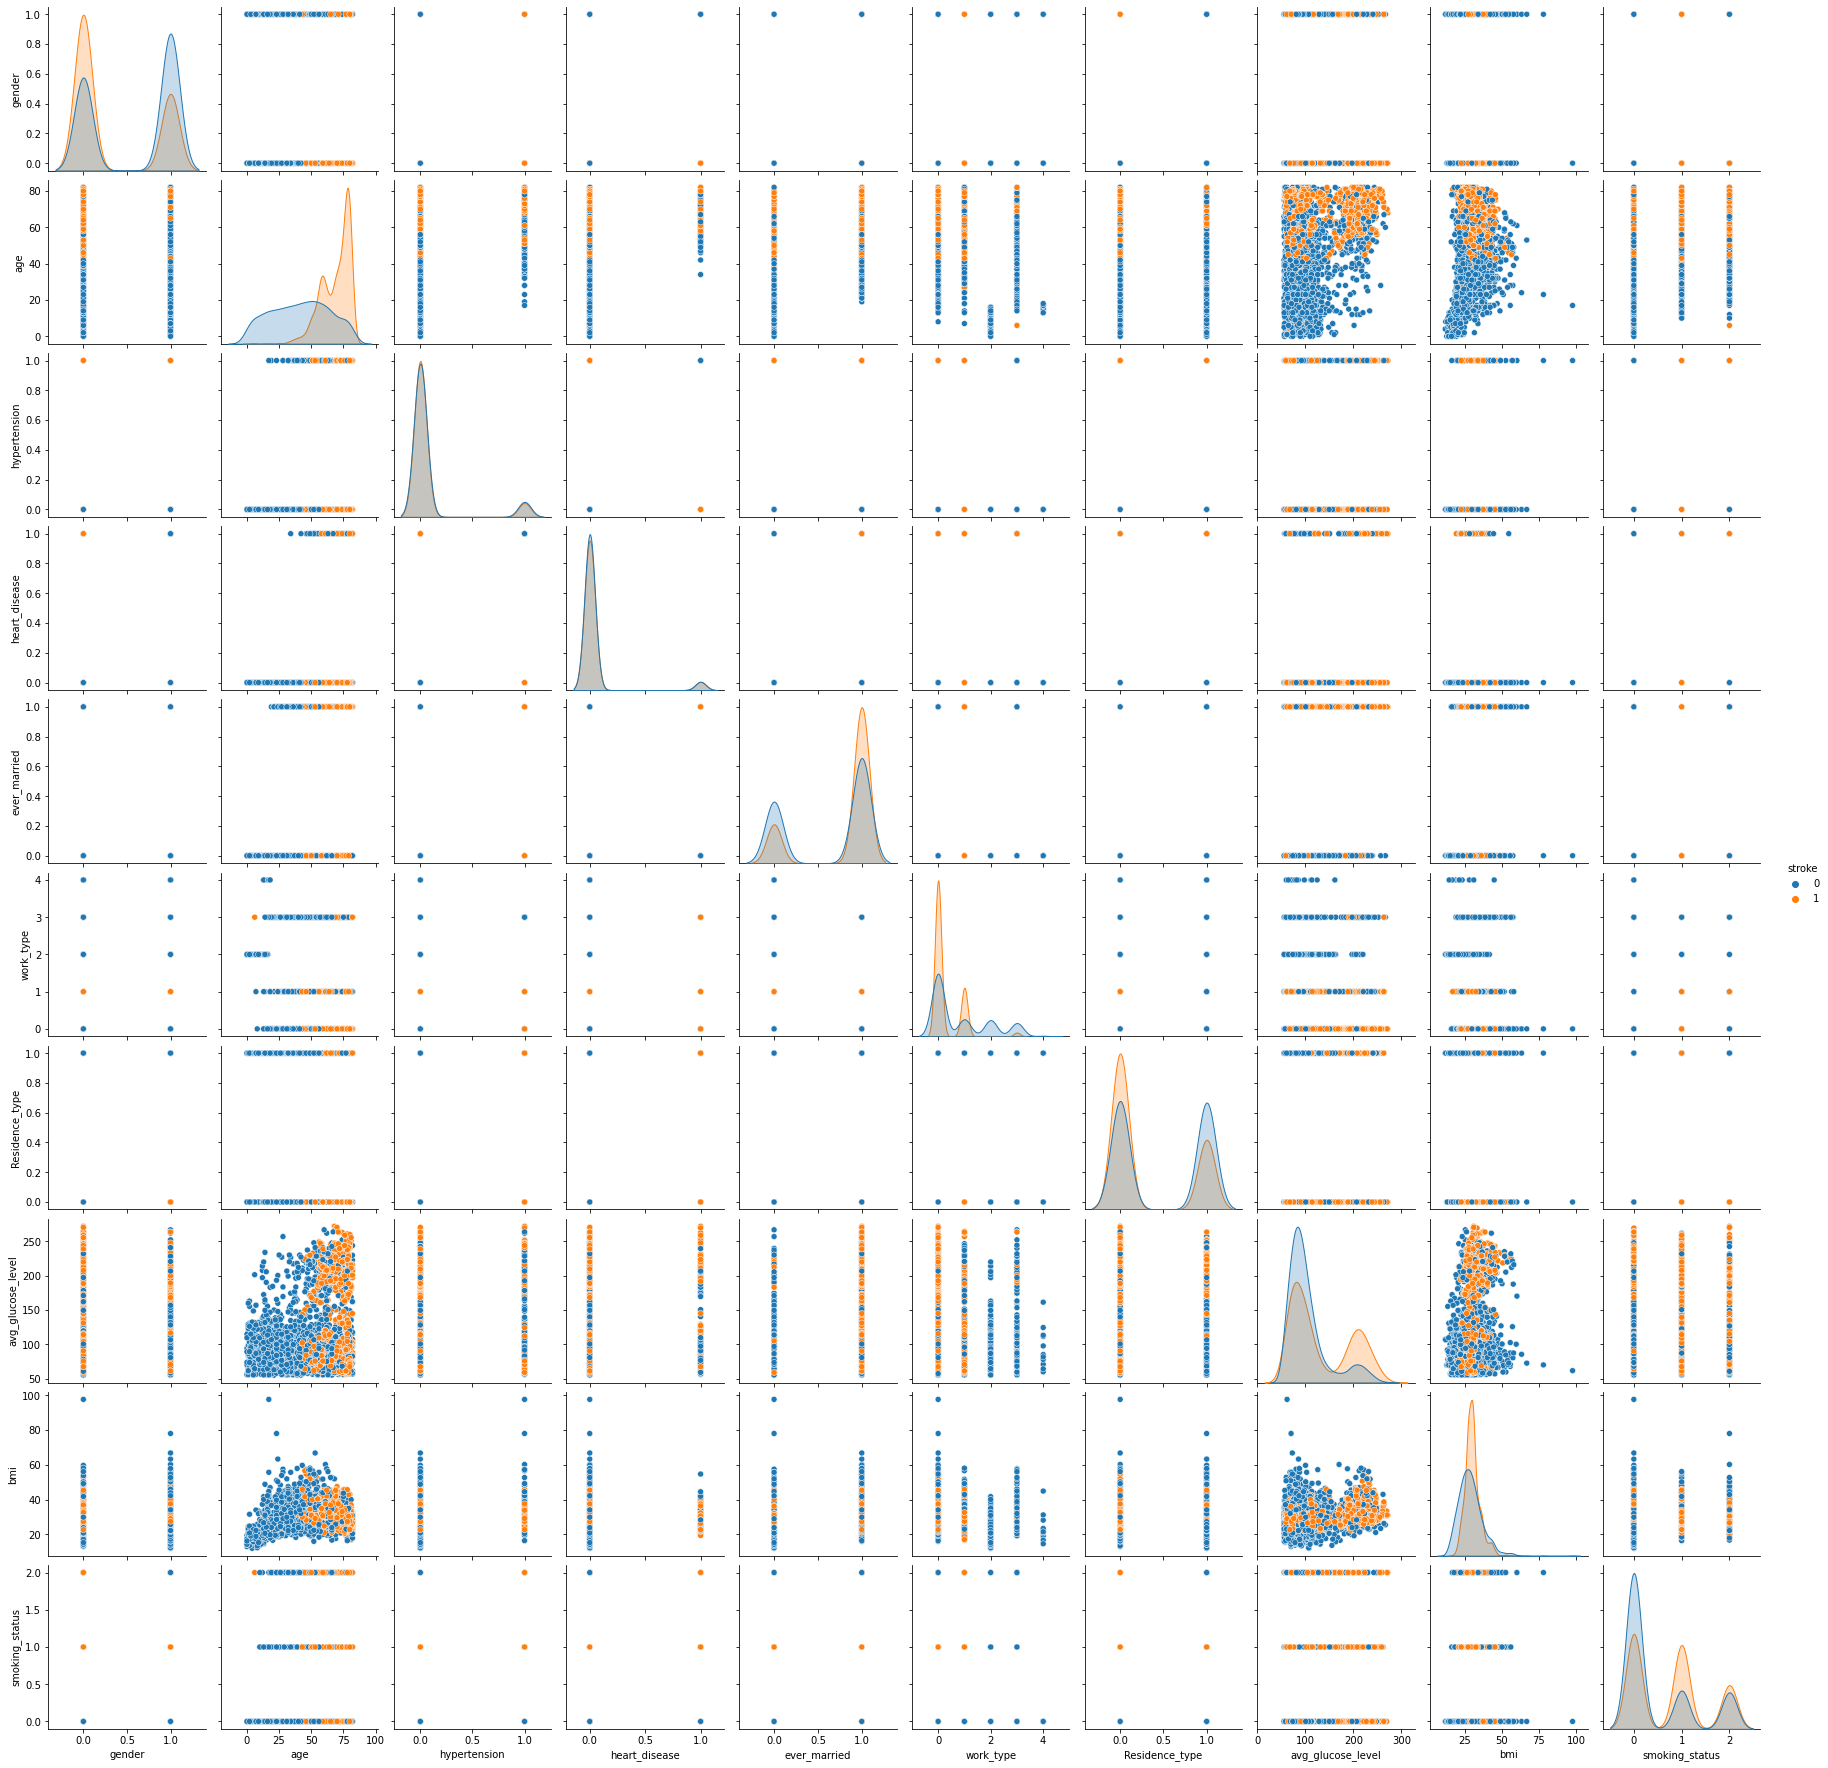

In [28]:
import seaborn as sns

sns.pairplot(data, hue='stroke')

In [29]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']], data['stroke'], test_size=0.33, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
y_pred = clf.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       663
           1       0.82      0.82      0.82       657

    accuracy                           0.82      1320
   macro avg       0.82      0.82      0.82      1320
weighted avg       0.82      0.82      0.82      1320



In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.8189528709270852

In [39]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
555,0,39,0,0,1,0,0,71.300000,34.700000,0
3491,1,17,0,0,0,0,1,104.020000,26.100000,0
527,1,40,0,0,1,0,0,131.990000,37.500000,0
3925,0,45,0,0,1,0,0,64.140000,29.400000,0
2989,0,71,0,0,1,0,1,102.426131,27.035604,1
...,...,...,...,...,...,...,...,...,...,...
328,0,71,0,0,1,0,0,230.559293,35.319662,1
1657,1,72,0,0,1,3,0,118.220000,21.900000,1
2258,0,49,0,0,1,1,1,70.730000,27.300000,1
2691,0,49,0,0,0,0,1,95.790000,24.000000,0


In [40]:
y_test

555     0
3491    0
527     0
3925    1
2989    1
       ..
328     1
1657    0
2258    0
2691    0
2303    1
Name: stroke, Length: 1320, dtype: int64

In [45]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [55]:
#data_pred = pd.merge([X_test, pd.DataFrame({'stroke': y_pred})])
data_pred = X_test.join(pd.DataFrame({'stroke': y_pred}, index=X_test.index))
data_pred

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
555,0,39,0,0,1,0,0,71.300000,34.700000,0,0
3491,1,17,0,0,0,0,1,104.020000,26.100000,0,0
527,1,40,0,0,1,0,0,131.990000,37.500000,0,0
3925,0,45,0,0,1,0,0,64.140000,29.400000,0,0
2989,0,71,0,0,1,0,1,102.426131,27.035604,1,1
...,...,...,...,...,...,...,...,...,...,...,...
328,0,71,0,0,1,0,0,230.559293,35.319662,1,1
1657,1,72,0,0,1,3,0,118.220000,21.900000,1,0
2258,0,49,0,0,1,1,1,70.730000,27.300000,1,0
2691,0,49,0,0,0,0,1,95.790000,24.000000,0,1


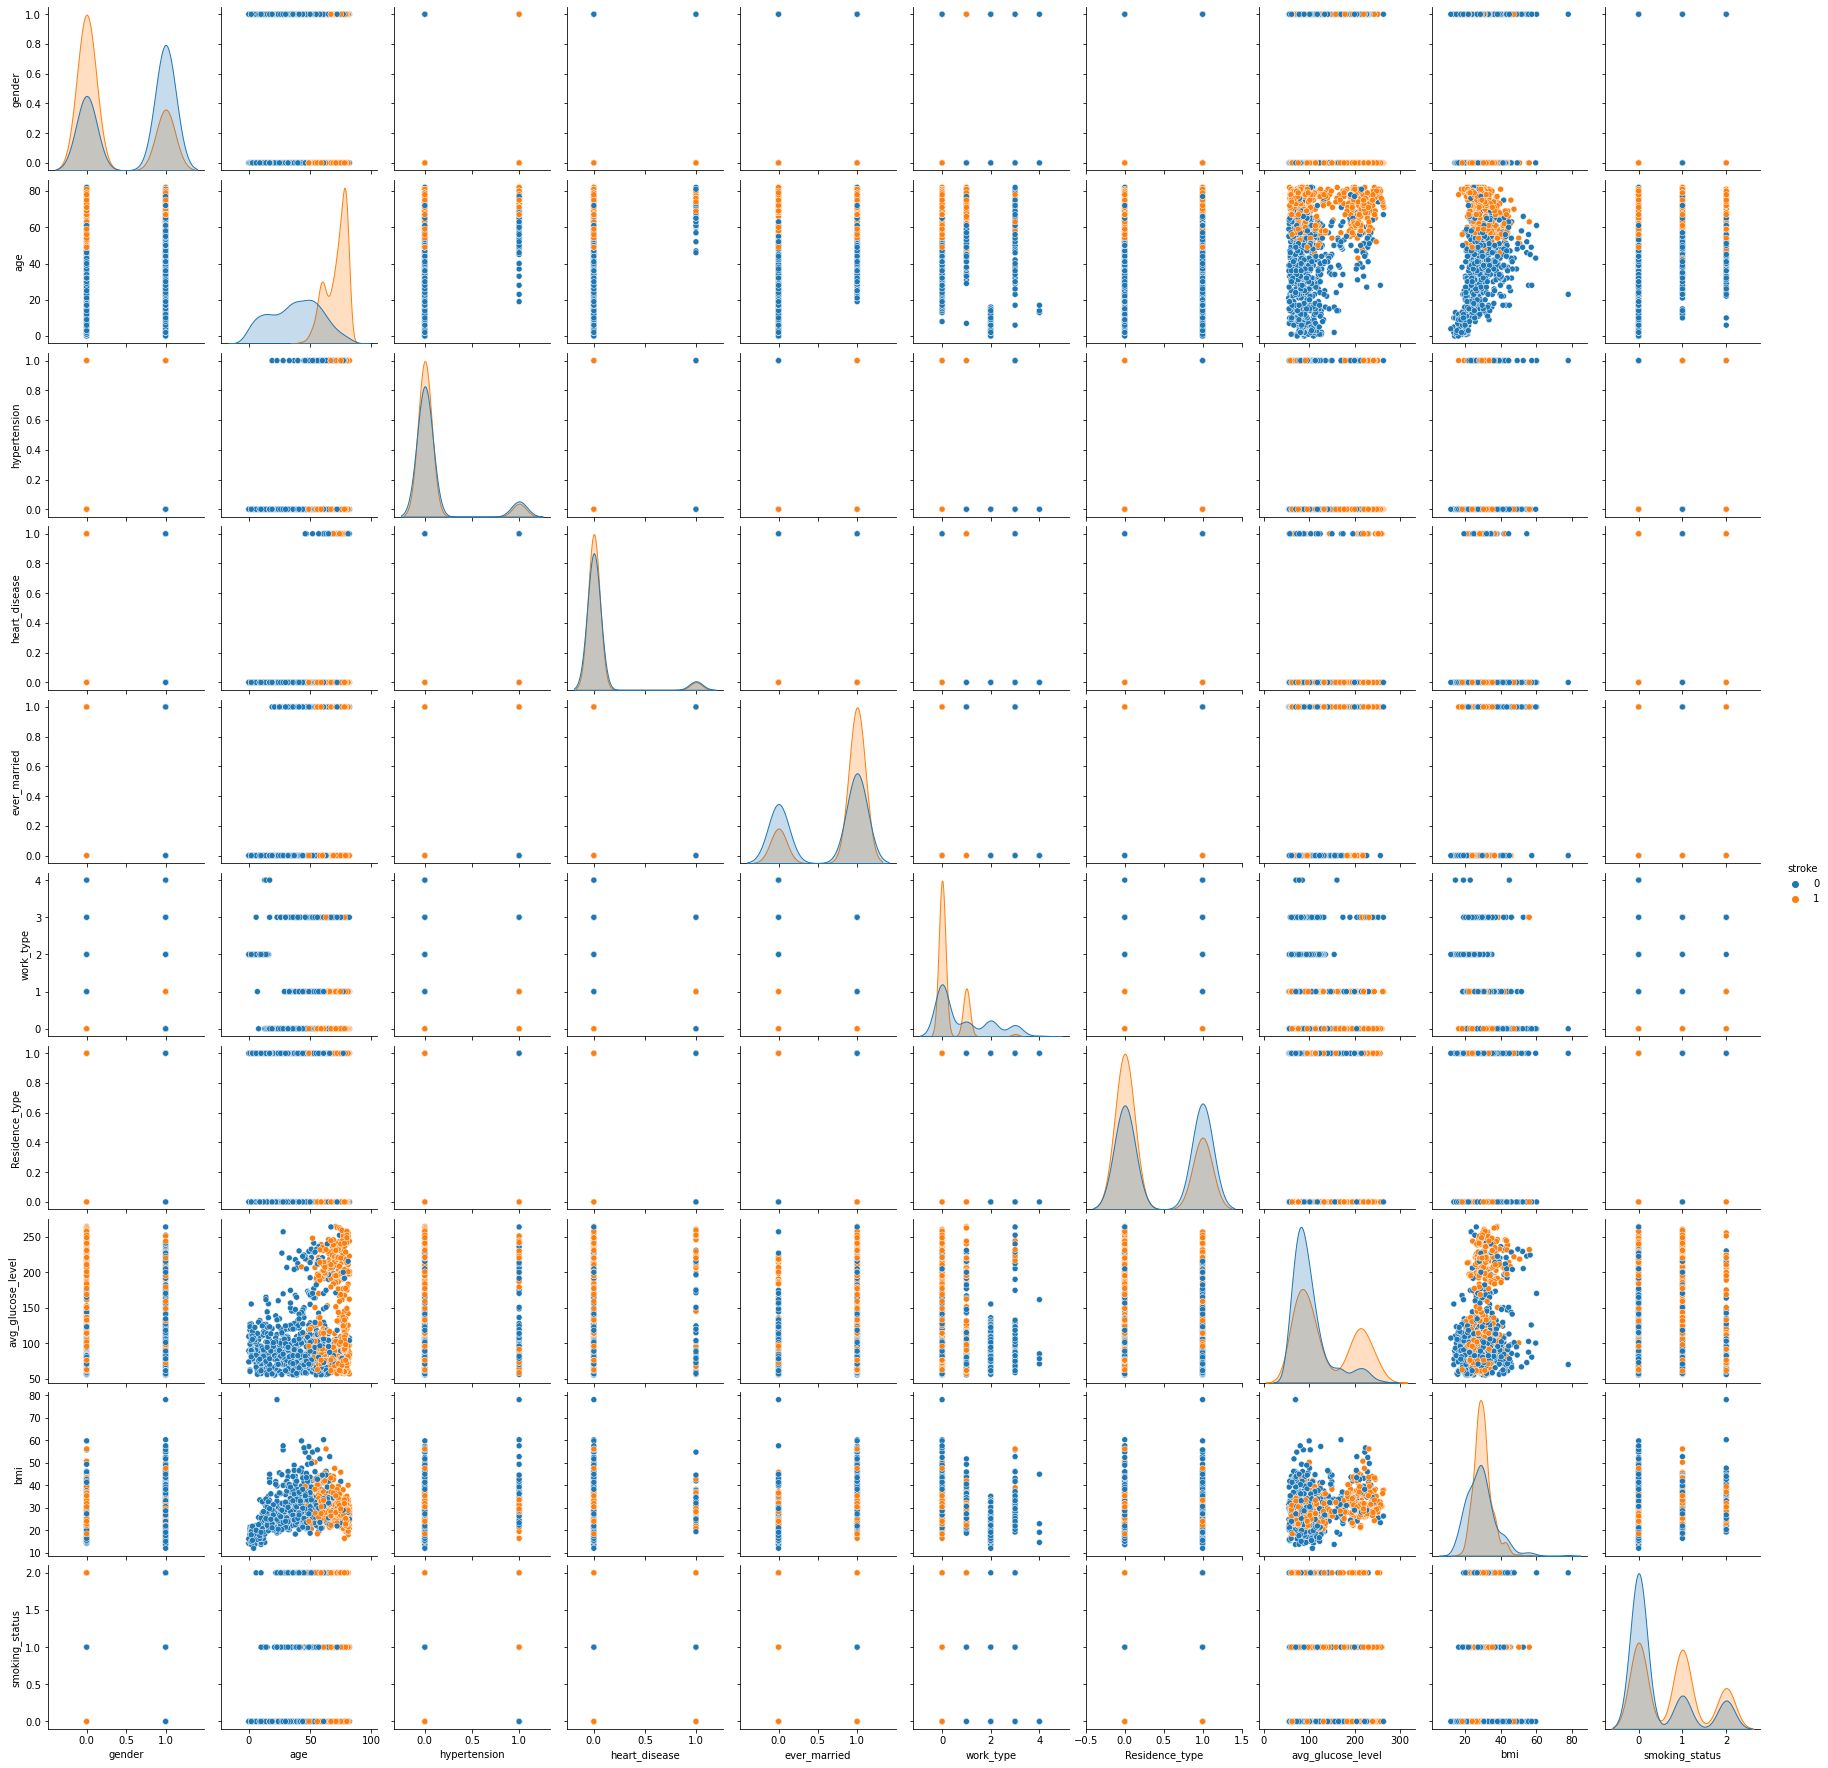

In [57]:
sns.pairplot(data_pred, hue='stroke')